# Predicting heart disease using supervised learning tools

predicting heart disease propability using python libraries

In [258]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,roc_curve,recall_score
import os
%matplotlib inline
cwd=os.getcwd()
path=cwd.split('/')
proj_path='/'.join(path[:-1])
models_dir=proj_path+'/models/'
data_dir=proj_path+'/data/'
notebook_dir=proj_path+'notebooks/'
data_dir



'/home/smaket/PycharmProjects/heart_disease_ete_proj/data/'

## Data preprocessing

In [2]:

df=pd.read_csv(data_dir+'heart-disease.csv')
column_description={'age':'age',
             'sex':'gender',
             'cp':'chest pain type',
             'trestbps':'resting blood presure',
             'chol': 'cholesterol level',
             'fbs': 'fasting blood sugar',
             'restecg':'resting electrocardiographic results',
             'thalach':'maximum heart rate',
             'exang' : 'exercise including angina',
             'oldpeak':'ST depression',
             'slope':'slope of ST exercise',
             'ca':'number of major vessels',
             'thal':'defect in heart',
             'target': 'disease or not'            
            }
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualize data

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


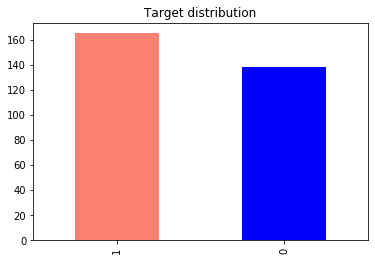

In [5]:
df["target"].value_counts().plot(kind='bar',color=['salmon','blue'],title='Target distribution')

/home/smaket/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


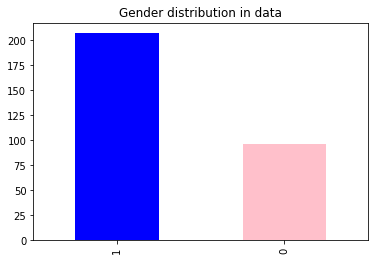

In [6]:
df['sex'].value_counts().plot(kind='bar',colors=['blue','pink'],title='Gender distribution in data')

<Figure size 432x288 with 0 Axes>

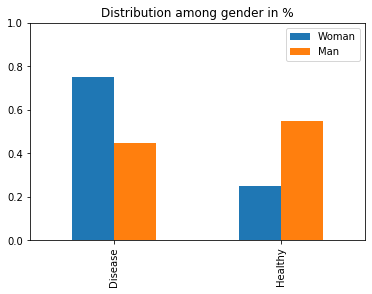

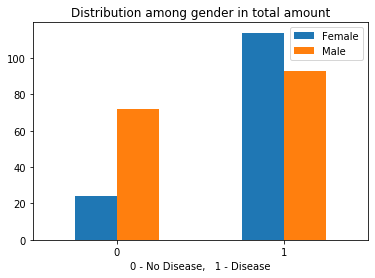

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

ax=plt.figure();
df_female=df.loc[df['sex']==0]
female_hd=len(df_female.loc[df_female['target']==1])/len(df_female)  
female_no_hd=len(df_female.loc[df_female['target']==0])/len(df_female) 

df_male=df.loc[df['sex']==1]
male_hd=len(df_male.loc[df_male['target']==1])/len(df_male) 
male_no_hd=len(df_male.loc[df_male['target']==0])/len(df_male) 

female={'Disease':female_hd,'Healthy':female_no_hd}
male={'Disease':male_hd,'Healthy':male_no_hd}
gender_comparsion=pd.DataFrame({'Woman':female,'Man':male})
gender_comparsion.plot.bar(title='Distribution among gender in %',ylim=(0,1))

pd.crosstab(df['sex'],df['target']).plot(kind='bar',title='Distribution among gender in total amount');
plt.legend(['Female','Male']);
plt.xlabel("0 - No Disease,   1 - Disease");
plt.xticks(rotation=0);

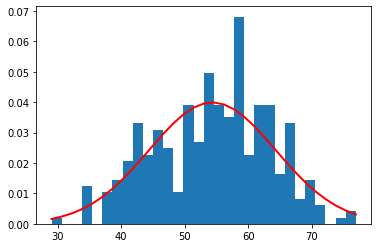

In [8]:
#df['age'].plot.hist()
s=df['age']
mu=df['age'].mean()
sigma=10
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

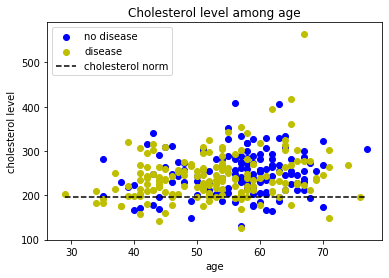

In [9]:
ax2=plt.figure();
desc=['healthy','disease']
for i,col in enumerate(['b','y']):
    df_t=df.loc[df['target']==i]
    plt.scatter(df_t["age"],df_t["chol"],c=col,label=desc[i])

plt.ylabel(column_description['chol'])
plt.xlabel(column_description['age'])
plt.title('Cholesterol level among age')
plt.hlines(195,df["age"].min(),df["age"].max(),linestyles='dashed')
plt.legend(['no disease','disease','cholesterol norm']);

In [10]:
column_description

{'age': 'age',
 'sex': 'gender',
 'cp': 'chest pain type',
 'trestbps': 'resting blood presure',
 'chol': 'cholesterol level',
 'fbs': 'fasting blood sugar',
 'restecg': 'resting electrocardiographic results',
 'thalach': 'maximum heart rate',
 'exang': 'exercise including angina',
 'oldpeak': 'ST depression',
 'slope': 'slope of ST exercise',
 'ca': 'number of major vessels',
 'thal': 'defect in heart',
 'target': 'disease or not'}

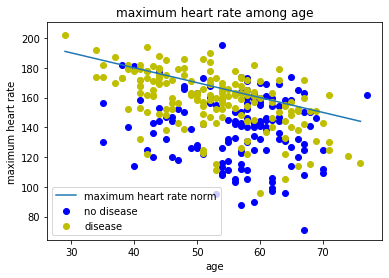

In [11]:
for i,col in enumerate(['b','y']):
    df_t=df.loc[df['target']==i]
    plt.scatter(df_t["age"],df_t['thalach'],c=col,label=desc[i])
    plt.ylabel(column_description['thalach'])
plt.xlabel(column_description['age'])
plt.title(column_description['thalach'] + ' among age')
plt.plot([x for x in range(df["age"].min(),df["age"].max())],[220-x for x in range(df["age"].min(),df["age"].max())])
plt.legend([column_description['thalach']+' norm','no disease','disease']);

Text(0.5, 1.0, 'Disease cases in terms of chest pain type:')

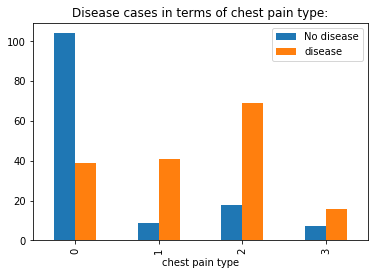

In [12]:
cp_type=pd.crosstab(df['cp'],df['target']).plot(kind='bar')
plt.legend(['No disease','disease']);
plt.xlabel(column_description['cp']);
plt.title('Disease cases in terms of chest pain type:')

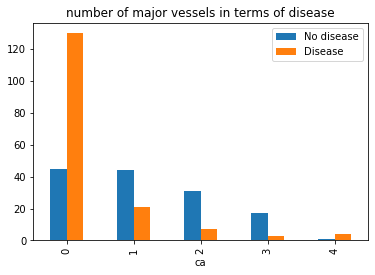

In [13]:
pd.crosstab(df['ca'],df['target']).plot(kind='bar',
                                        title=column_description['ca']+' in terms of disease')
plt.legend(['No disease','Disease'])

Text(0.5, 0, '1,3 - in norm 0,2,7 - exceeded')

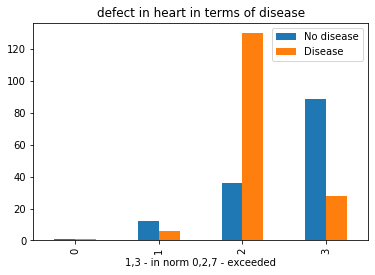

In [14]:
pd.crosstab(df['thal'],df['target']).plot(kind='bar',
                                        title=column_description['thal']+' in terms of disease')
plt.legend(['No disease','Disease'])
plt.xlabel('1,3 - in norm 0,2,7 - exceeded')

In [15]:
## make corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

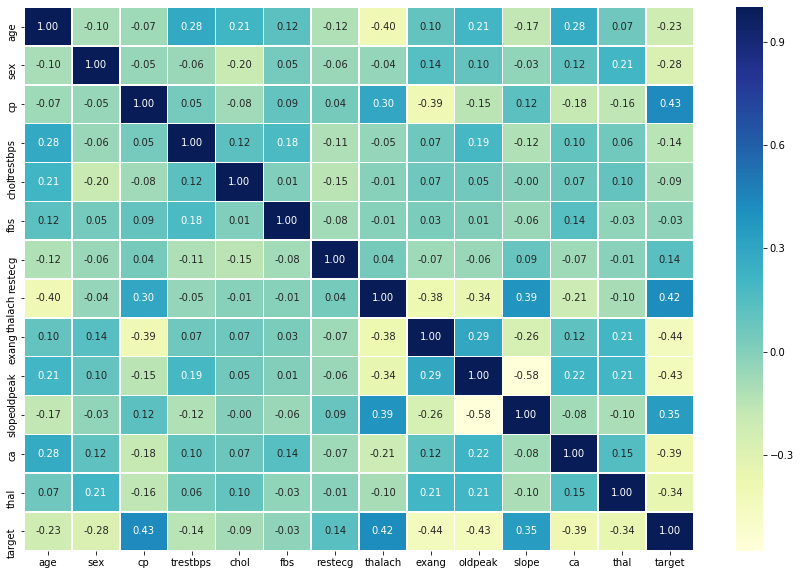

In [16]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.2f',cmap="YlGnBu")
bottom, top =ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)


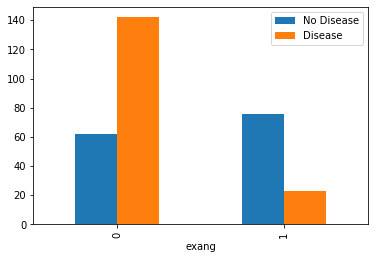

In [17]:
pd.crosstab(df['exang'],df['target']).plot(kind='bar')
plt.legend(['No Disease','Disease'])

## Modeling

In [200]:
from sklearn.metrics import accuracy_score,precision_score,roc_curve,classification_report
from sklearn.metrics import recall_score,f1_score,roc_auc_score,confusion_matrix
acronym_dict={'KNN':'K-Nearest Neigbours','RFC':'Random Forest Classifier','LogReg':'Logistic Regression','CB':'CatBoost','XB': 'XGBoost'}
# evaluating function
def evaluate_classifier(y_true,y_preds,label):
    np.random.seed(100)
    acc=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    fpr,tpr,treshold=roc_curve(y_true,y_preds)
    ax1=plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr)
    plt.plot([0,1],'-r')
    plt.title(acronym_dict[label]+' '+ 'performance - ROC curve')
    plt.legend(['Area under the curve = '+str(roc_auc_score(y_true,y_preds))])
    evaluation_dict={'accuracy':acc,'precision':precision,'recall':recall,'f1 score':f1}
    plt.subplot(1,2,2)
    ax = sns.heatmap(confusion_matrix(y_true,y_preds),cmap='hot',annot=True)
    bottom, top =ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
    plt.title(f"Confusion matrix for {acronym_dict[label]}")
    print(f"Classification_report for {acronym_dict[label]}")
    print(classification_report(y_true,y_preds))
    
    
    
    return evaluation_dict
    

In [201]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#preparing sets 
np.random.seed(42)
df.sample(frac=1)
# Prepare x and y 

x=df.drop('target',axis=1)
y=df['target']
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2)
# x,y=shuffle(x,y)
# #create train valid and test set 70:15:15
# valid_split=round(0.7*len(df["target"]))
# test_split=round(valid_split+0.15*len(df["target"]))
# x_train,y_train=x[:valid_split],y[:valid_split]
# x_valid,y_valid=x[valid_split:test_split],y[valid_split:test_split]
# x_test,y_test=x[test_split:],y[test_split:]


### Random forest 

Classification_report for Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61

Classification_report for K-Nearest Neigbours
              precision    recall  f1-score   support

           0       0.68      0.47      0.56        32
           1       0.56      0.76      0.65        29

    accuracy                           0.61        61
   macro avg       0.62      0.61      0.60        61
weighted avg       0.63      0.61      0.60        61

Classification_report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        32
           1       0.75      0.72      0.74        29

    accuracy                           

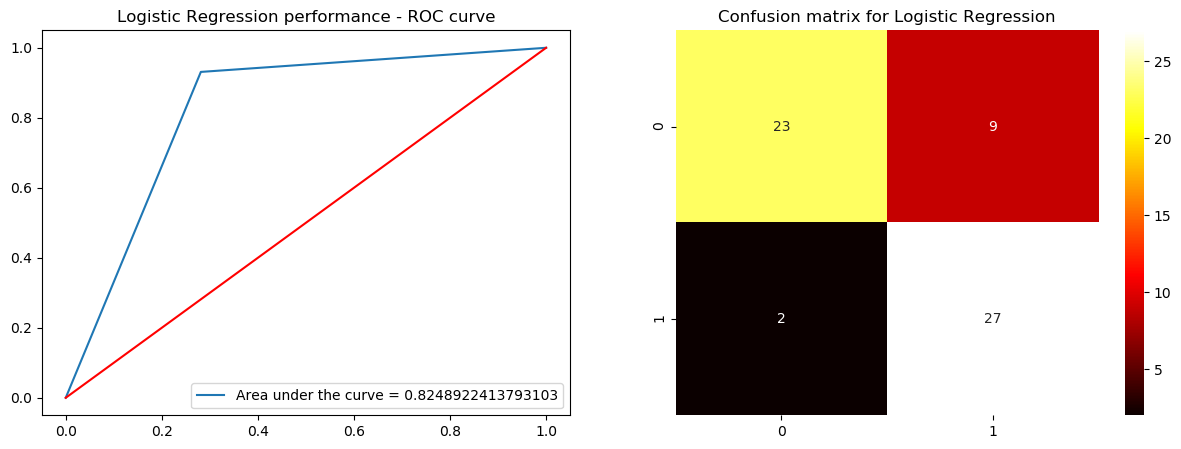

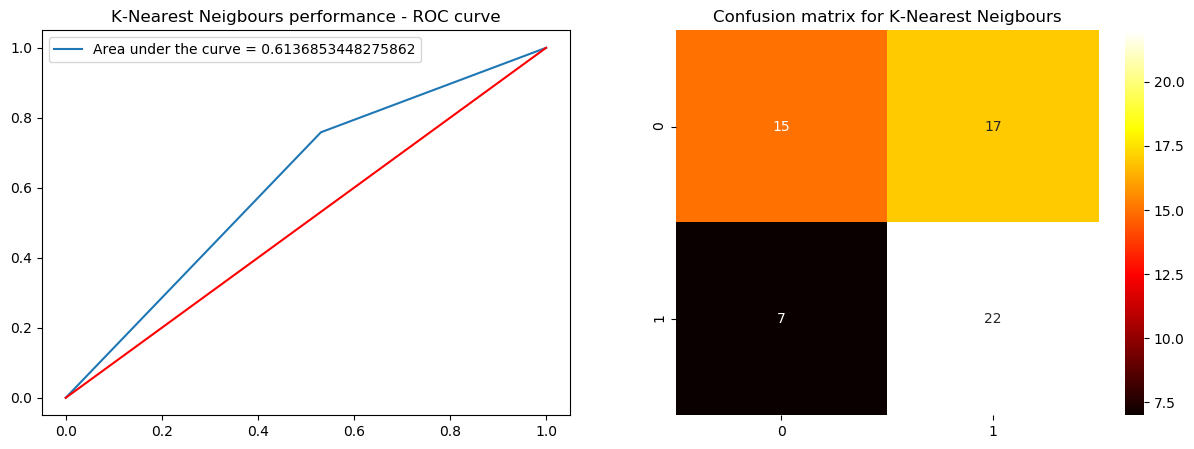

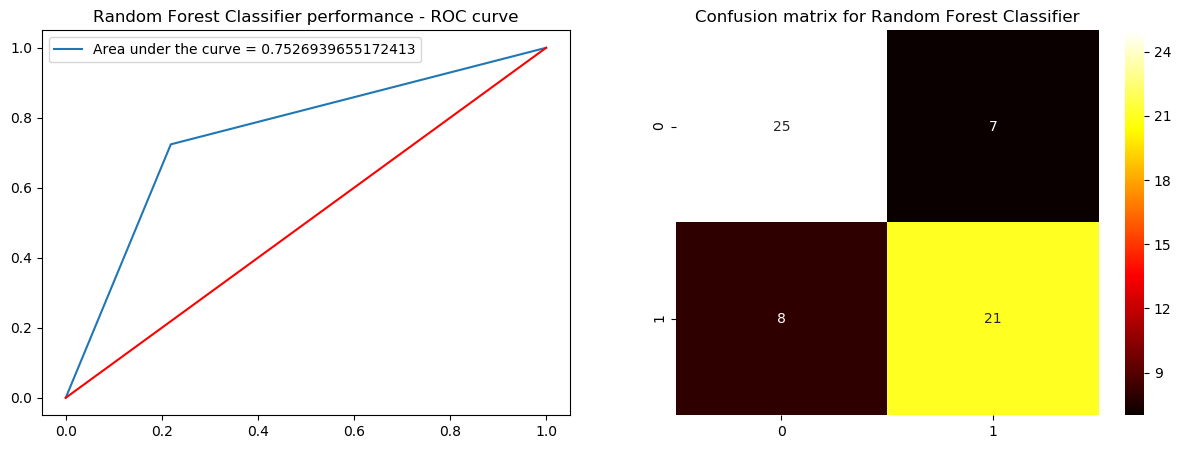

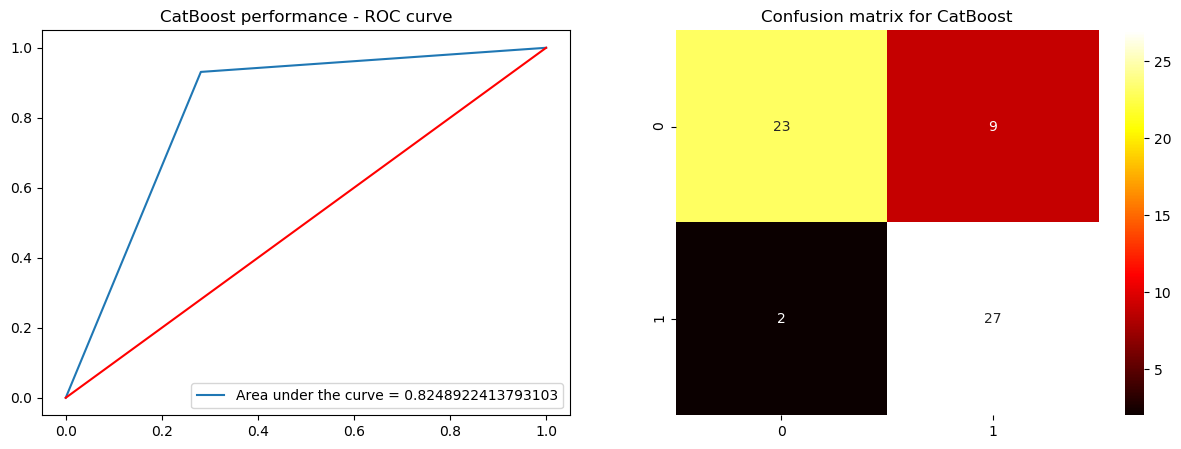

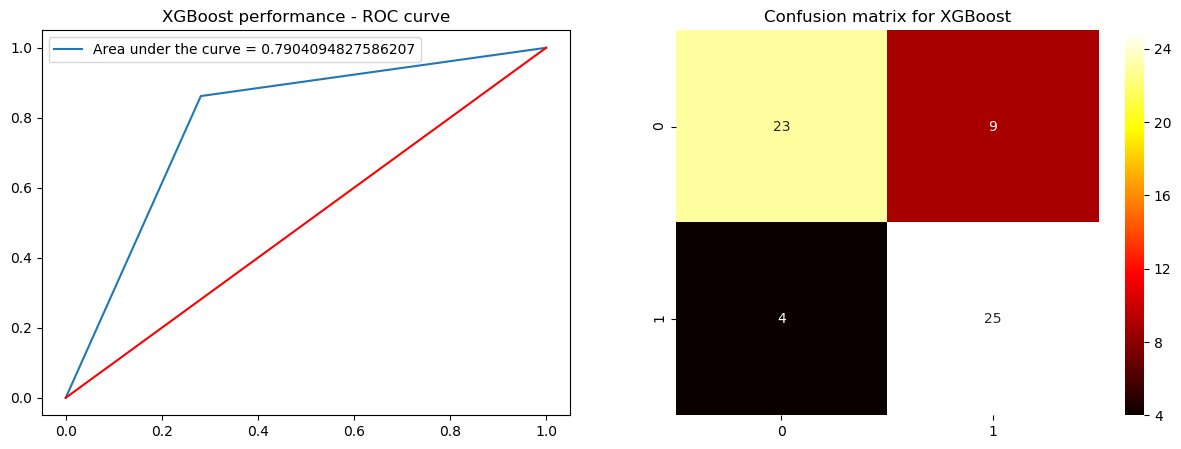

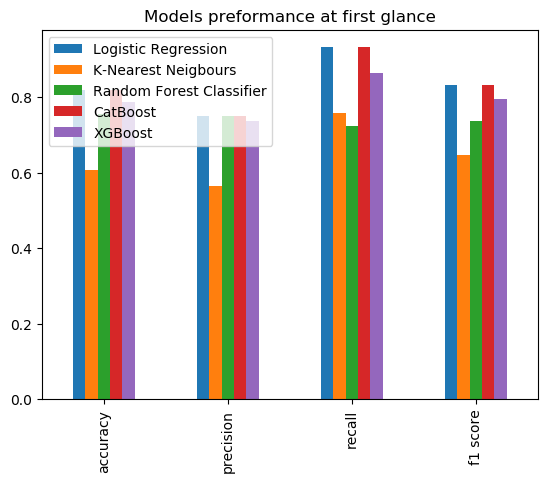

In [234]:
!pip install catboost
!pip install xgboost
import warnings
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from catboost import CatBoostClassifier
np.random.seed(100)
warnings.simplefilter('ignore')
models_dict={'LogReg':LogisticRegression(),
             'KNN':KNeighborsClassifier(),
             "RFC":RandomForestClassifier(),
             'CB':CatBoostClassifier(verbose=False),
             'XB':  XGBClassifier()}
def create_and_evaluate(clf):
    model=models_dict[clf]
    model.fit(x_train,y_train)

#cross_val_score(model,x,y,cv=5)
    y_preds=model.predict(x_valid)
    model_score=evaluate_classifier(y_valid,y_preds,clf)
    return model_score

model_scores={acronym_dict[k]:create_and_evaluate(k) for k in  models_dict.keys() }
comparsion=pd.DataFrame(model_scores)
comparsion.plot(kind='bar', title='Models preformance at first glance')

### Logistic Regression amd Random Forest have good results at first attempt

## Improve performance by:
* Hyperparameter tuning


## 1. For KNN model

In [235]:
from sklearn.model_selection import GridSearchCV,cross_val_score

def tune_hyperparms(clf,grid,label):
    np.random.seed(100)
    grid_model=GridSearchCV(clf,grid,cv=5)
    grid_model.fit(x_train,y_train)
    y_preds=grid_model.predict(x_valid)
    best=grid_model.best_params_
    evaluation=evaluate_classifier(y_valid,y_preds,label)
    return evaluation,best
    


Classification_report for K-Nearest Neigbours
              precision    recall  f1-score   support

           0       0.65      0.53      0.59        32
           1       0.57      0.69      0.62        29

    accuracy                           0.61        61
   macro avg       0.61      0.61      0.61        61
weighted avg       0.61      0.61      0.60        61



{'n_neighbors': 3, 'p': 1}

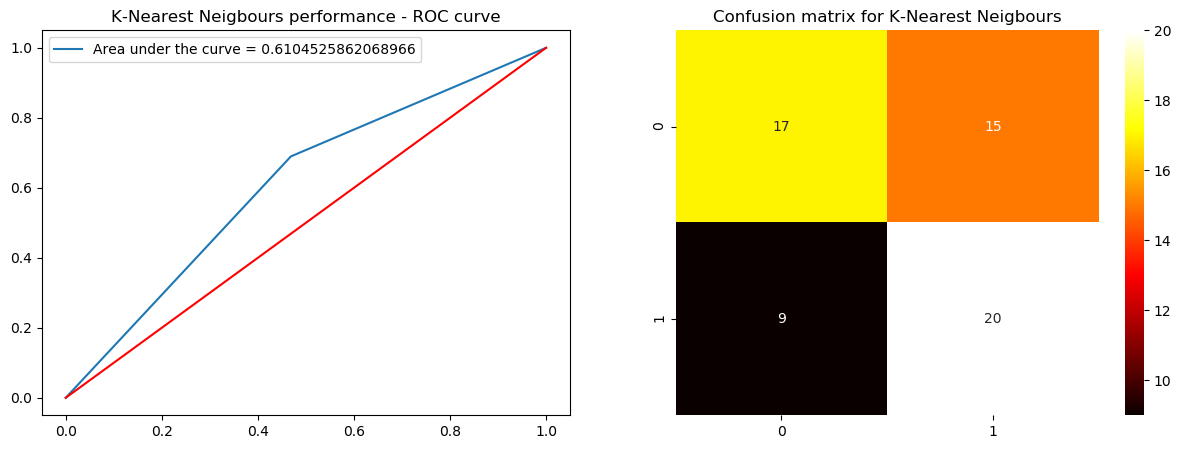

In [236]:
np.random.seed(100)
knn_grid={'p':[1,2,3],
          'n_neighbors':[1,2,3,5,10,15,20]}
knn=KNeighborsClassifier()
evaluation,best_params=tune_hyperparms(knn,knn_grid,'KNN')
best_params

## 2. For Logistic Regression Model

Classification_report for Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.73      0.93      0.82        29

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



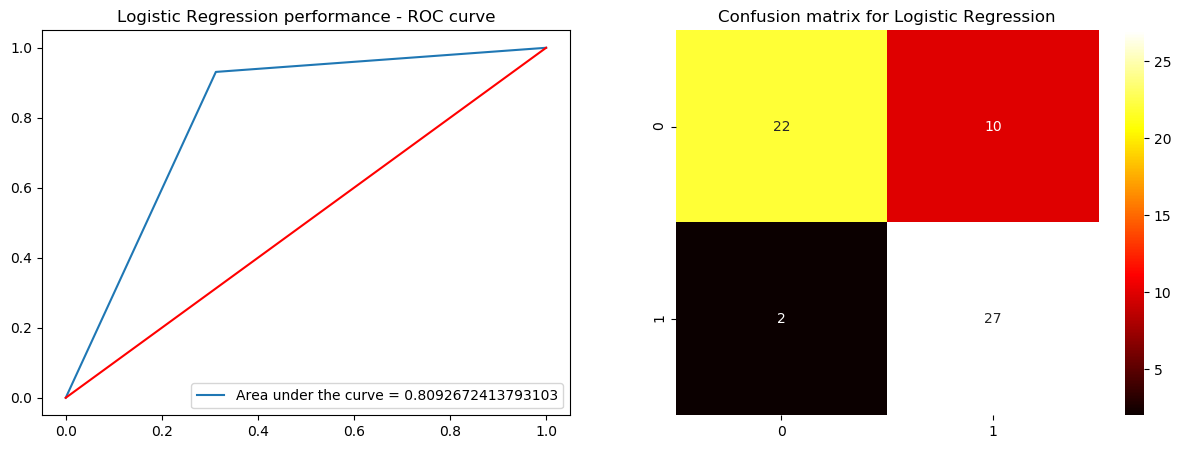

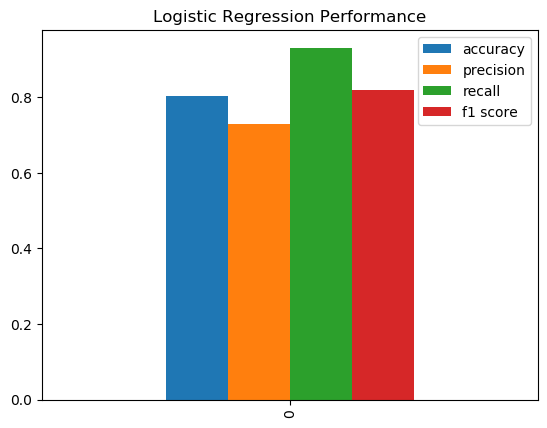

In [237]:
np.random.seed(100)
lr_grid={'C':np.logspace(-4,4,20),
         'multi_class':['auto', 'ovr'],
         'max_iter':[10,20,50,100,120,150,200],
         'penalty':['l1', 'l2'],
         'fit_intercept':[False],
         'intercept_scaling':[True,False],
          'class_weight':[None,'balanced']
        }

lr_model=LogisticRegression(solver='liblinear')
evaluation,best_params=tune_hyperparms(lr_model,lr_grid,'LogReg')
best_params
pd.DataFrame({k:[v] for k,v in evaluation.items()}).plot(kind='bar',title="Logistic Regression Performance")

In [238]:
## Cross validation 
lr_model=LogisticRegression(C=0.23357214690901212,
 class_weight=None,
 fit_intercept= False,
 intercept_scaling=False,
 max_iter=10,
 multi_class='auto',
 penalty='l1')
cross_val_score(lr_model,x_valid,y_valid,cv=5).mean()

0.7074592074592074

**Checking feature corelation**

Text(0.5, 1.0, 'Corelation to target')

<Figure size 640x480 with 0 Axes>

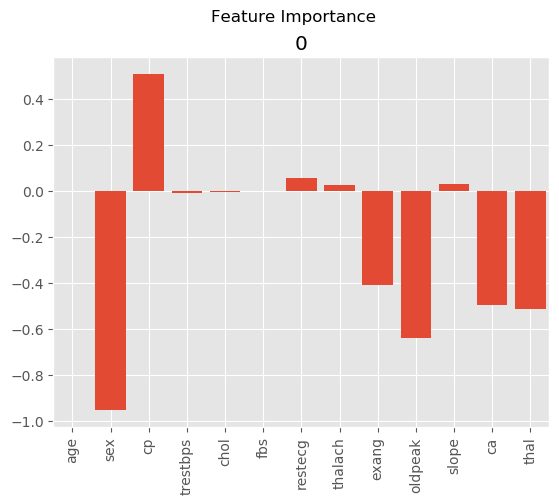

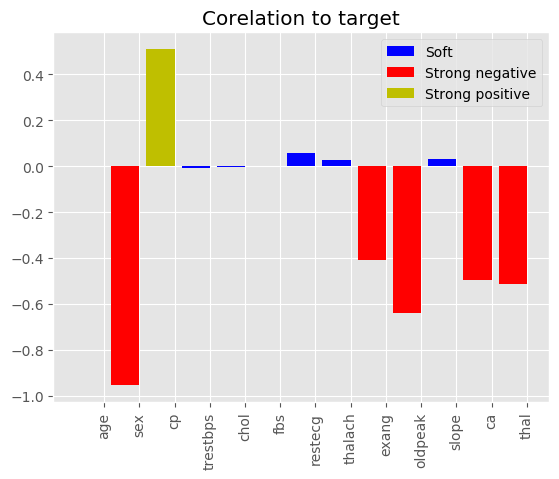

In [239]:
import matplotlib
plt.style.use('ggplot')
lr_model.fit(x_train,y_train)
df.columns
feature_importance=dict(zip(df.columns,lr_model.coef_[0]))
feature_importance

plt.figure()
ax=pd.DataFrame({k:[v] for k,v in feature_importance.items()}).T.plot.bar(
                                                                   title='Feature Importance',
                                                                   legend=False,
                                                                   subplots=True)


container=plt.bar(x=[x for x in range(len(lr_model.coef_[0]))],height=lr_model.coef_[0]) 
significant_params=[]
plt.figure();
for idx,box in enumerate(container.patches):
    
    if box.get_height()<-0.1:
        plt.bar(box.get_bbox().get_points()[0][0],box.get_height(),color='r')
        significant_params.append(df.columns[idx])
        
    elif box.get_height()>0.1:
        plt.bar(box.get_bbox().get_points()[0][0],box.get_height(),color='y')
        significant_params.append(df.columns[idx])
    else:
        plt.bar(box.get_bbox().get_points()[0][0],box.get_height(),color='b')
plt.xticks(np.array([x for x in range(len(df.columns)-1)]),df.columns,rotation='vertical');
plt.legend(['Soft','Strong negative','Strong positive'])
plt.title("Corelation to target")

## 3. For Random Forest Classifier

In [240]:
from sklearn.model_selection import RandomizedSearchCV
plt.style.use('default')
def tune_hyperparms_random(clf,grid,label):
    np.random.seed(100)
    grid_model=RandomizedSearchCV(clf,grid,cv=5)
    grid_model.fit(x_train,y_train)
    y_preds=grid_model.predict(x_valid)
    best=grid_model.best_params_
    evaluation=evaluate_classifier(y_valid,y_preds,label)
    return evaluation,best

Classification_report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.91      0.66      0.76        32
           1       0.71      0.93      0.81        29

    accuracy                           0.79        61
   macro avg       0.81      0.79      0.78        61
weighted avg       0.82      0.79      0.78        61



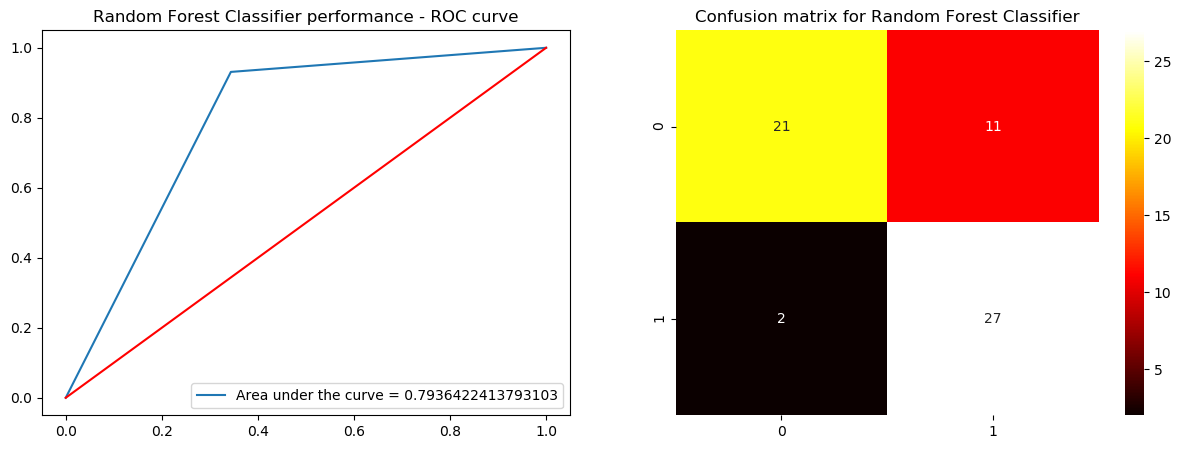

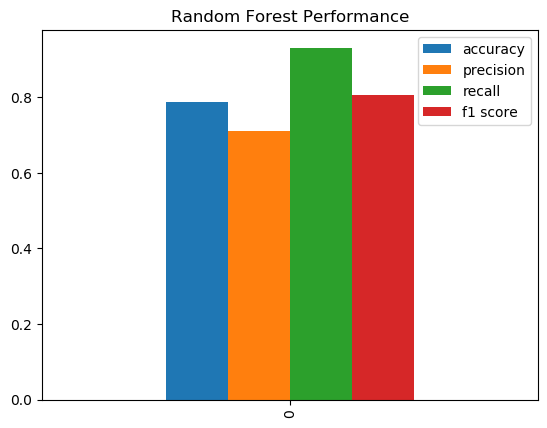

In [241]:
rfc_grid={
         'max_features':['auto','sqrt','log2',None],                
         'n_estimators':np.arange(10,1000,50),
         'max_depth':[2,5,8,10,15,20,None],
         'min_samples_split':[2,5,8,10,15],
         'min_samples_leaf':np.arange(1,20,2)
         }

rfc_model=RandomForestClassifier()
evaluation,best_params=tune_hyperparms_random(rfc_model,rfc_grid,'RFC')
best_params
pd.DataFrame({k:[v] for k,v in evaluation.items()}).plot(kind='bar',title='Random Forest Performance')

### Validation via cross validtion score

In [242]:
rf_model=RandomForestClassifier(n_estimators=960,
 min_samples_split=10,
 min_samples_leaf=1,
 max_features='auto',
 max_depth=2)
cross_val_score(rf_model,x_valid,y_valid,cv=5).mean()

0.7210955710955712

# Experimentation

* Try different model CatBoost XGBoost
* More data
* Reduce Features
* Try neural network

## For logistic regression 

In [243]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#preparing sets 
np.random.seed(42)
df.sample(frac=1)
# Prepare x and y 

x=pd.DataFrame({k:df[k] for k in significant_params})
y=df['target']
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.12)



Classification_report for Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.65      0.81      0.72        16

    accuracy                           0.73        37
   macro avg       0.74      0.74      0.73        37
weighted avg       0.75      0.73      0.73        37



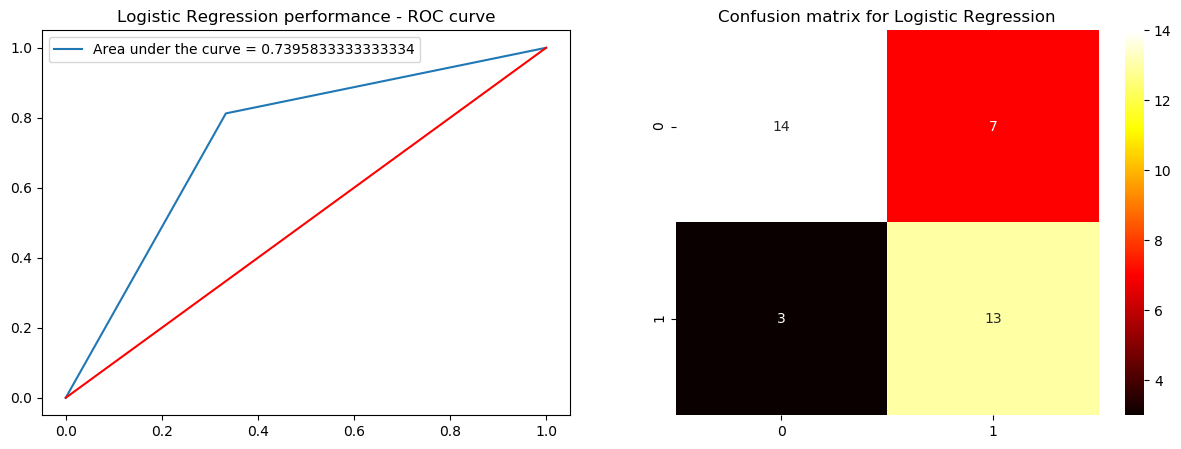

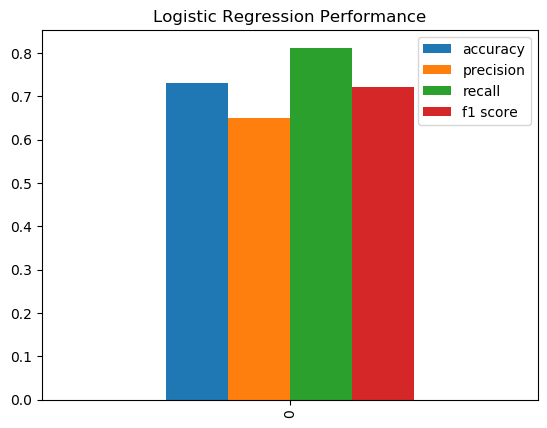

In [244]:
np.random.seed(100)
plt.style.use('default')
lr_grid={'C':np.logspace(-4,4,20),
         'multi_class':['auto', 'ovr'],
         'max_iter':[10,20,50,100,120,150,200],
         'penalty':['l1', 'l2'],
         'fit_intercept':[False],
         'intercept_scaling':[True,False],
          'class_weight':[None,'balanced']
        }

lr_model=LogisticRegression(solver='liblinear')
evaluation,best_params=tune_hyperparms(lr_model,lr_grid,'LogReg')
best_params
pd.DataFrame({k:[v] for k,v in evaluation.items()}).plot(kind='bar',title="Logistic Regression Performance")

In [245]:
## Cross validation 
lr_model=LogisticRegression(C=0.23357214690901212,
 class_weight=None,
 fit_intercept= False,
 intercept_scaling=False,
 max_iter=10,
 multi_class='auto',
 penalty='l1')
cross_val_score(lr_model,x_valid,y_valid,cv=5).mean()

0.7047619047619047

##  For Random Forest Classifier

Classification_report for Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        21
           1       0.73      1.00      0.84        16

    accuracy                           0.84        37
   macro avg       0.86      0.86      0.84        37
weighted avg       0.88      0.84      0.84        37

{'n_estimators': 160, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'auto', 'max_depth': None}


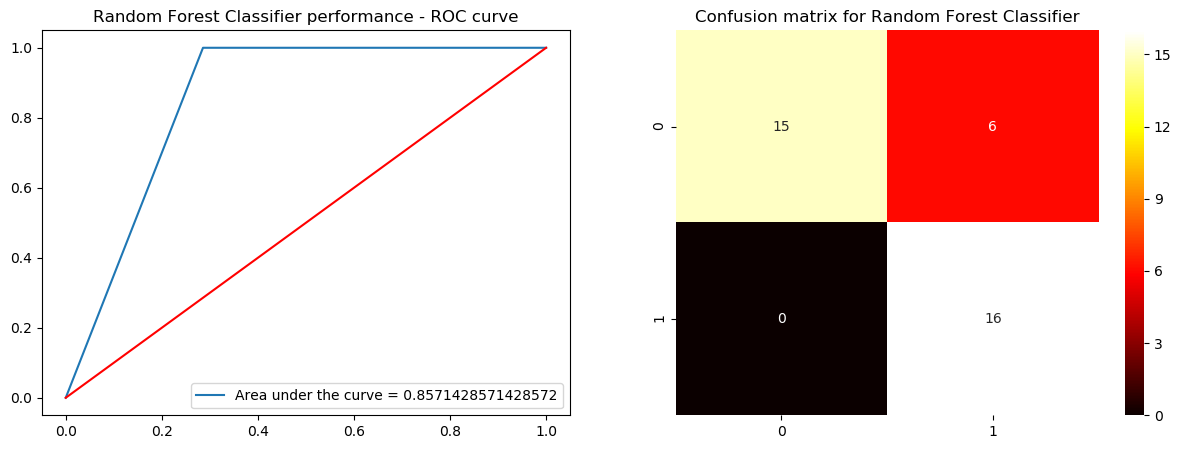

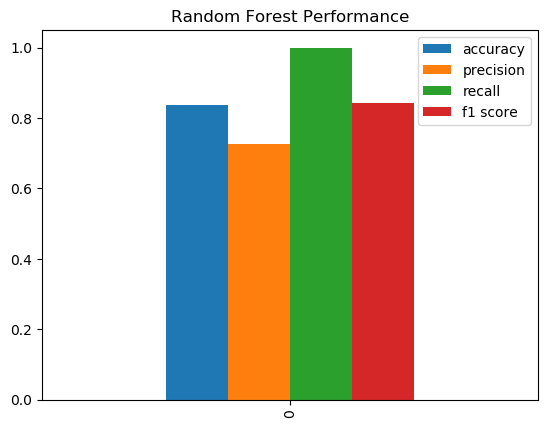

In [246]:
rfc_grid={
         'max_features':['auto','sqrt','log2',None],                
         'n_estimators':np.arange(10,1000,50),
         'max_depth':[2,5,8,10,15,20,None],
         'min_samples_split':[2,5,8,10,15],
         'min_samples_leaf':np.arange(1,20,2)
         }

rfc_model=RandomForestClassifier()
evaluation,best_params=tune_hyperparms_random(rfc_model,rfc_grid,'RFC')
print(best_params)
pd.DataFrame({k:[v] for k,v in evaluation.items()}).plot(kind='bar',title='Random Forest Performance')

In [247]:
rf_model=RandomForestClassifier(n_estimators=960,
 min_samples_split=2,
 min_samples_leaf=3,
 max_features='auto',
 max_depth=10)
cross_val_score(rf_model,x_valid,y_valid,cv=5).mean()

0.7555555555555555

## For Catboost

Classification_report for CatBoost
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

{'iterations': 65, 'depth': 3}


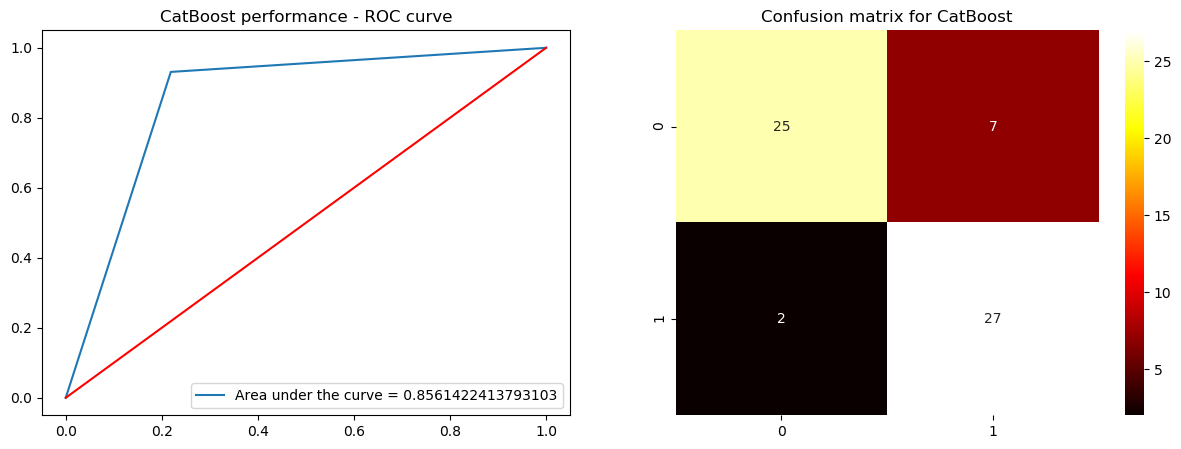

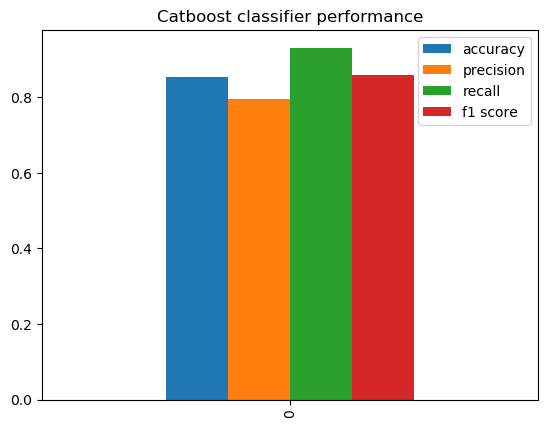

In [251]:
np.random.seed(100)
plt.style.use('default')
catboost_grid={
         'depth':np.arange(3,16,5),
         'iterations':np.arange(5,100,10),
         
        }

catboost_model=CatBoostClassifier(verbose=False)
evaluation,best_params=tune_hyperparms_random(catboost_model,catboost_grid,'CB')
print(best_params)
pd.DataFrame({k:[v] for k,v in evaluation.items()}).plot(kind='bar',title="Catboost classifier performance")

**with original dataset*

Classification_report for CatBoost
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

{'iterations': 65, 'depth': 3}


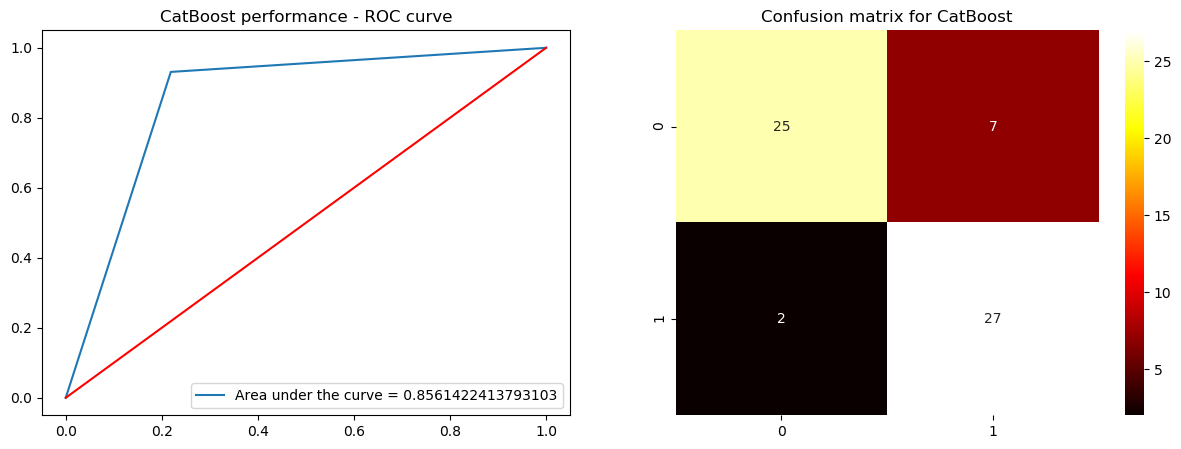

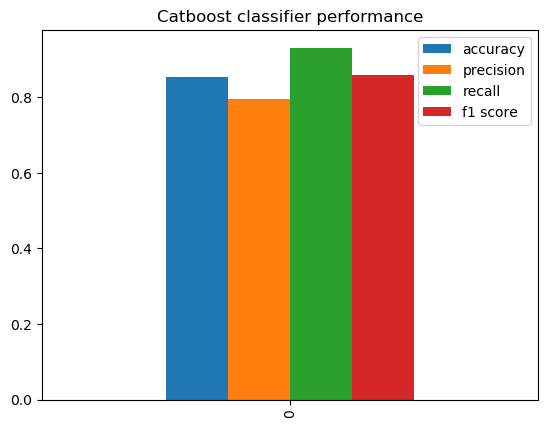

In [252]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#preparing sets 
np.random.seed(42)
df.sample(frac=1)
# Prepare x and y 

x=df.drop('target',axis=1)
y=df['target']
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2)
# x,y=shuffle(x,y)
# #create train valid and test set 70:15:15
# valid_split=round(0.7*len(df["target"]))
# test_split=round(valid_split+0.15*len(df["target"]))
# x_train,y_train=x[:valid_split],y[:valid_split]
# x_valid,y_valid=x[valid_split:test_split],y[valid_split:test_split]
# x_test,y_test=x[test_split:],y[test_split:]
np.random.seed(100)
plt.style.use('default')
catboost_grid={
         'depth':np.arange(3,16,5),
         'iterations':np.arange(5,100,10),
         
        }

catboost_model=CatBoostClassifier(verbose=False)
evaluation,best_params=tune_hyperparms_random(catboost_model,catboost_grid,'CB')
print(best_params)
pd.DataFrame({k:[v] for k,v in evaluation.items()}).plot(kind='bar',title="Catboost classifier performance")

In [256]:
catboost_model=CatBoostClassifier(iterations=65, depth=3,verbose=False)
cross_val_score(catboost_model,x_valid,y_valid,cv=5).mean()

0.7266899766899767

# Saving best 2 models

In [261]:
import pickle
pickle.dump(rf_model,open(models_dir+'Random_forest_heart_disease_classifier.pkl','wb'))
pickle.dump(catboost_model,open(models_dir+'Catboost_model_classifier.pkl', 'wb'))